
# Linear Algebra with Python — Chapter 1: Introduction to Linear Algebra

**Focus:** practical NumPy code + minimal math exposition.  
**Libraries:** `numpy`, `matplotlib` (for simple visuals).

> Tip: run cells top-to-bottom. Use this notebook as a cheatsheet + playground.

---

- **Linear Algebra** := Linear algebra is the branch of mathematics concerning linear equations, linear maps, and their representations in vector spaces and through matrices.
- **Python** := Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.

More info:

- [Linea Algebra](https://en.wikipedia.org/wiki/Linear_algebra)
- [Python](https://en.wikipedia.org/wiki/Python_(programming_language))

## Getting started

Some knowledge of Python is required.

```bash
uv init .
uv sync
# Select Kernel -> Run cells
```

## Importing Libraries

In [109]:
# Lazy import example with try / except:
try:
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    # import seaborn as sns  # uncomment to trigger error

    np.set_printoptions(suppress=True, linewidth=120)
    print("NumPy:", np.__version__)
    print("Matplotlib:", matplotlib.__version__)
    # print("Seaborn:", sns.__version__) # uncomment to trigger error
except ModuleNotFoundError as e:
    print("Module not found:", e)


NumPy: 2.3.3
Matplotlib: 3.10.6


In [110]:
# Note: to apply 'safe import' we can use this approach:
import importlib

def safe_import(name):
    try:
        return importlib.import_module(name)
    except ModuleNotFoundError:
        return None
    
sns = safe_import("seaborn")
print("Seaborn:",    getattr(sns, "__version__", "not installed"))

Seaborn: not installed



## Motivations

- Vectors and matrices are the native language of many data problems: embeddings, PCA, least squares, neural nets, graphics.  
- This chapter builds a compact toolbox you’ll reuse everywhere.

### Why Use Python?

Python is a versatile language suitable for machine learning, data science and protoyping features with state of the art tools.


## Creating Vectors in Python

- **Vector**:
    - **Mathematics:** an element in a vector space which has magnitude and direction in Euclidean spaces. In general, a vector can be added and scaled.
    - **Programming:** usually a data structure that stores and ordered collection of elements in memory. Usual operations are: push or append, pop or remove, map, etc.

**Note:** a vector in Mathematics has a different meaning than its counterpart in Programming, however, the concepts are closely related when using numerical libraries such as numpy.

In [111]:

# 1D vector (row-like) — shape: (n,)
v_row = np.array([1., 2., 3.])
print("v_row:\n", v_row)
print("\nshape:", v_row.shape, end=", ")
print("size:", v_row.size, end=", ")
print("type:", type(v_row), end="")

v_row:
 [1. 2. 3.]

shape: (3,), size: 3, type: <class 'numpy.ndarray'>

In [112]:
# Column vector — shape: (n, 1)
v_col = v_row.reshape(-1, 1)
print("v_col:\n", v_col)
print("\nshape:", v_col.shape, end=", ")
print("size:", v_col.size, end=", ")
print("type:", type(v_col), end="")

v_col:
 [[1.]
 [2.]
 [3.]]

shape: (3, 1), size: 3, type: <class 'numpy.ndarray'>

## The Algebra of Vectors

In [113]:

# Define two vectors:
a = np.array([1., 3., -2.])
b = np.array([2., 0., 4.])
print("a:", a)
print("b:", b)

a: [ 1.  3. -2.]
b: [2. 0. 4.]


In [114]:
# Basic ops
print("a + b =", a + b) # vector addition
print("a - b =", a - b) # vector substraction
print("2 * a =", 2 * a) # vector scalar product

a + b = [3. 3. 2.]
a - b = [-1.  3. -6.]
2 * a = [ 2.  6. -4.]


In [115]:
# Dot / inner product and norm
dot_ab = a @ b              # or np.dot(a, b)
print("a · b =", dot_ab)

a · b = -6.0


In [116]:
# Euclidean norm:
norm_a = np.linalg.norm(a)  # Euclidean (L2) norm of a
norm_b = np.linalg.norm(b)  # Euclidean (L2) norm of b
print("||a||_2 =", norm_a)
print("||b||_2 =", norm_b)

||a||_2 = 3.7416573867739413
||b||_2 = 4.47213595499958


In [117]:
import math 

def rad_to_deg(x: float, decimals=2) -> float:
    if not -math.pi < x < math.pi:
        raise ValueError(f"angle must be in [-π , +π ], but got: {x}")
    if decimals < 0:
        raise ValueError(f"decimals must be positive, but got: {decimals}")
    return round(( x / math.pi ) * 180, decimals)

# Dot product identity: ||a|| * || b || * cos(a, b) = a · b, Therefore:
cos_a_b = dot_ab / ( norm_a * norm_b )
print("cos(a, b):", cos_a_b)

# Which means:
ang_a_b = math.acos(cos_a_b)
print(f"a and b have an angle of: {ang_a_b} rad or {rad_to_deg(ang_a_b)} deg") 

cos(a, b): -0.35856858280031806
a and b have an angle of: 1.9375303858871702 rad or 111.01 deg


In [118]:
# Correct value for previous calculation is 111.012 in deg
expected = 111.012 # deg
calculated = rad_to_deg(ang_a_b, 3)

assert expected == calculated

absolute_error = round(abs(expected - calculated), 10)
relative_error = round(abs(absolute_error / expected * 100), 10)
print("Absolute Error:", absolute_error, "deg")
print("Relative Error:", relative_error, "%")

# What happens if we increase the decimals?

Absolute Error: 0.0 deg
Relative Error: 0.0 %


In [119]:
tol = 1e-3
decimals = 10
expected = round(rad_to_deg(math.acos(-3 / math.sqrt(70)), decimals), decimals) # correct value
calculated = round(rad_to_deg(ang_a_b, 3), decimals)

assert (expected - calculated) <= tol # assert with tolerance

absolute_error = round(abs(expected - calculated), decimals)
relative_error = round(abs(absolute_error / expected * 100), decimals)
print("Absolute Error:", absolute_error, "deg")
print("Relative Error:", relative_error, "%")

Absolute Error: 0.0003137897 deg
Relative Error: 0.0002826621 %


In [120]:
# Unit vector
norm_a = np.linalg.norm(a)
u = a / (norm_a if norm_a != 0 else 1.0)
u = [float(round(i, 3)) for i in u]
print("unit(a) =", f"{a}/√{round(norm_a, 3)} =", u)
print("")
print("||unit(a)||≈", np.linalg.norm(u))


unit(a) = [ 1.  3. -2.]/√3.742 = [0.267, 0.802, -0.535]

||unit(a)||≈ 1.0003589355826237


## Creating Matrices in Python

- **Matrix:**
    - **Mathematics** := rectangular array of numbers or other mathematical objects with elements or entries arranged in rows and columns, usually satisfying certain properties of addition and multiplication. In linear algebra, matrices are used as linear maps (Mathematical functions).
    - **Programming** := usually a data structure that stores 2D or ND, in general, arrays. The available operations depends on the used library or the implementation. Speacial note to approximations and precision loss should be taken.

More info:

- [Matrix (Maths)](https://en.wikipedia.org/wiki/Matrix_(mathematics))
- [Linea maps](https://en.wikipedia.org/wiki/Linear_map)
- [Matrix (Programming)](https://en.wikipedia.org/wiki/Matrix_(mathematics)#Computational_aspects)

In [121]:

# Matrices in Numpy
A = np.array([[1., 2., 3.],
              [0., -1., 4.]])
print("A:\n", A)
print("shape:", A.shape)

A:
 [[ 1.  2.  3.]
 [ 0. -1.  4.]]
shape: (2, 3)


In [122]:
Z = np.zeros((3, 3))
E = np.eye(3)
R = np.random.default_rng(0).standard_normal((3, 3))

print("\nZeros:\n", Z)
print("\nIdentity I3:\n", E)
print("\nRandom (seeded):\n", R)


Zeros:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Identity I3:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Random (seeded):
 [[ 0.12573022 -0.13210486  0.64042265]
 [ 0.10490012 -0.53566937  0.36159505]
 [ 1.30400005  0.94708096 -0.70373524]]


## Matrix-Vector Operations

In [123]:
A = np.array([[1., 2., 3.],
              [4., 5., 6.]])
x = np.array([0.5, -1.0, 2.0])  # shape (3,)
y = A @ x                       # matrix product -> result shape (2,)
print(f"A {A.shape}:")
print(A)
print("")
print(f"x {x.shape}:")
print(x)
print("---------------")
print(f"A @ x {y.shape}:")
print(y)

A (2, 3):
[[1. 2. 3.]
 [4. 5. 6.]]

x (3,):
[ 0.5 -1.   2. ]
---------------
A @ x (2,):
[4.5 9. ]


## Matrix-Vector Compatibility

In [124]:
# Check matrix compatibility for product
def mm_compat(A, B):
    print("A.shape:", A.shape, "B.shape:", B.shape)
    try:
        C = A @ B
        print("A @ B ok -> shape:", C.shape)
    except ValueError as e:
        print("Compatibility error:", e)

A = np.random.default_rng(1).standard_normal((2, 3))
x_ok = np.random.default_rng(2).standard_normal(3)
x_bad = np.random.default_rng(3).standard_normal(4)

mm_compat(A, x_ok)   # ok
mm_compat(A, x_bad)  # error


A.shape: (2, 3) B.shape: (3,)
A @ B ok -> shape: (2,)
A.shape: (2, 3) B.shape: (4,)
Compatibility error: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)


## Matrix Multiplication as a Transformation

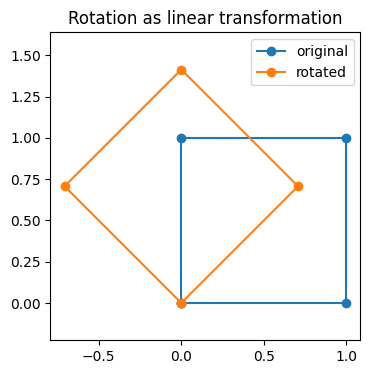

In [125]:

# Rotate points in 2D by theta: Square example
theta = np.deg2rad(45)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Create a square and rotate
square = np.array([[0, 0, 1, 1, 0],
                   [0, 1, 1, 0, 0]], dtype=float)  # 2x5
rot_square = R @ square

plt.figure(figsize=(4, 4))
plt.plot(square[0], square[1], marker='o', label='original')
plt.plot(rot_square[0], rot_square[1], marker='o', label='rotated')
plt.axis('equal')
plt.legend()
plt.title("Rotation as linear transformation")
plt.show()


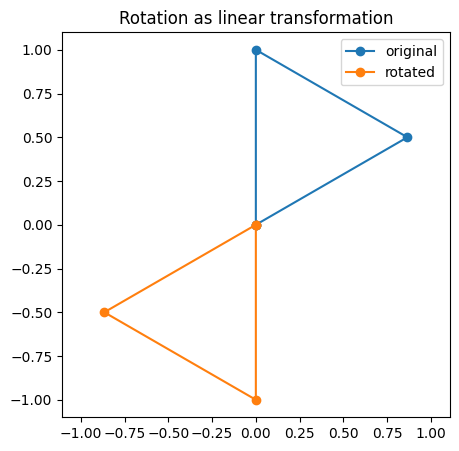

In [126]:

# Rotate points in 2D by theta: Triangle
theta = np.deg2rad(180)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Create a triangle and rotate
triangle = np.array([[0, math.sin(math.pi/3), 0, 0],
                   [0, math.cos(math.pi/3), 1, 0]], dtype=float)  # 2x4
rot_triangle = R @ triangle

plt.figure(figsize=(5, 5))
plt.plot(triangle[0], triangle[1], marker='o', label='original')
plt.plot(rot_triangle[0], rot_triangle[1], marker='o', label='rotated')
plt.axis('equal')
plt.legend()
plt.title("Rotation as linear transformation")
plt.show()


## Reflections

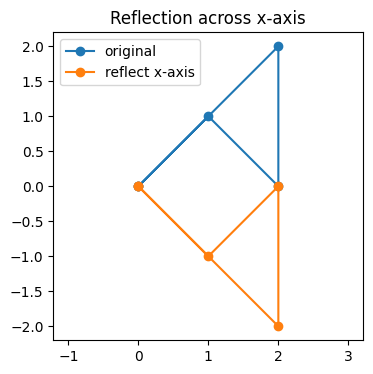

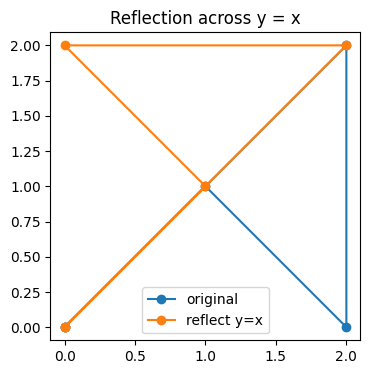

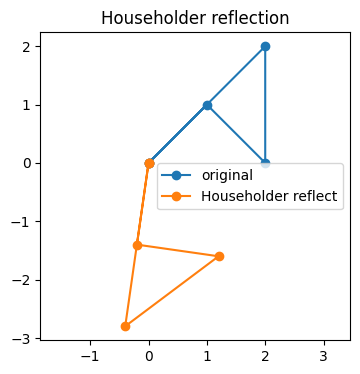

In [127]:

# Reflection across x-axis: diag(1, -1)
Fx = np.diag([1., -1.])
# Reflection across y=x: swap matrix
Fxy = np.array([[0., 1.],
                [1., 0.]])

pts = np.array([[0, 1, 2, 2, 0],
                [0, 1, 0, 2, 0]], dtype=float)

ref_x = Fx @ pts
ref_xy = Fxy @ pts

plt.figure(figsize=(4, 4))
plt.plot(pts[0], pts[1], marker='o', label='original')
plt.plot(ref_x[0], ref_x[1], marker='o', label='reflect x-axis')
plt.axis('equal')
plt.legend()
plt.title("Reflection across x-axis")
plt.show()

plt.figure(figsize=(4, 4))
plt.plot(pts[0], pts[1], marker='o', label='original')
plt.plot(ref_xy[0], ref_xy[1], marker='o', label='reflect y=x')
plt.axis('equal')
plt.legend()
plt.title("Reflection across y = x")
plt.show()

# Householder reflection across a line through the origin defined by unit vector u
u = np.array([1., 2.])
u = u / np.linalg.norm(u)
H = np.eye(2) - 2 * np.outer(u, u)  # reflection about the line orthogonal to u
ref_house = H @ pts

plt.figure(figsize=(4, 4))
plt.plot(pts[0], pts[1], marker='o', label='original')
plt.plot(ref_house[0], ref_house[1], marker='o', label='Householder reflect')
plt.axis('equal')
plt.legend()
plt.title("Householder reflection")
plt.show()


## Matrix-Matrix Calculations

In [128]:

A = np.array([[2., 1., 0.],
              [1., 3., 4.],
              [0., 1., 1.]])
B = np.array([[1., 2., 3.],
              [0., -1., 2.],
              [5.,  0., 1.]])

print("A @ B =\n", A @ B)
print("\nB @ A =\n", B @ A)
print("\nA.T =\n", A.T) # transpose
print("")
print("trace(A) =", np.trace(A))
print("det(A)   =", np.linalg.det(A))
print("rank(A)  =", np.linalg.matrix_rank(A))


A @ B =
 [[ 2.  3.  8.]
 [21. -1. 13.]
 [ 5. -1.  3.]]

B @ A =
 [[ 4. 10. 11.]
 [-1. -1. -2.]
 [10.  6.  1.]]

A.T =
 [[2. 1. 0.]
 [1. 3. 1.]
 [0. 4. 1.]]

trace(A) = 6.0
det(A)   = -3.000000000000001
rank(A)  = 3


## Matrix Multiplication Compatibility

In [129]:

A = np.random.default_rng(0).standard_normal((2, 3))
B = np.random.default_rng(1).standard_normal((3, 4))
C = np.random.default_rng(2).standard_normal((5, 2))

print("(2x3)@(3x4) ->", (A @ B).shape)
try:
    A @ C  # (2x3)@(5x2) — incompatible
except ValueError as e:
    print("Incompatible shapes:", e)


(2x3)@(3x4) -> (2, 4)
Incompatible shapes: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 3)


## Matrix Multiplication — Order Matters

In [130]:

P = np.array([[1., 2.],
              [0., 1.]])
Q = np.array([[0., 1.],
              [1., 0.]])

print("P @ Q =\n", P @ Q)
print("\nQ @ P =\n", Q @ P)  # not equal to P@Q


P @ Q =
 [[2. 1.]
 [1. 0.]]

Q @ P =
 [[0. 1.]
 [1. 2.]]


## Intro to the Matrix Inverse

In [131]:

A = np.array([[4., 7.],
              [2., 6.]])
A_inv = np.linalg.inv(A)
I = A @ A_inv
print("A:\n", A)
print("\nA^{-1}:\n", A_inv)
print("\nA @ A^{-1} ≈ I:\n", I)

# Singular example (non-invertible)
S = np.array([[1., 2.],
              [2., 4.]])
print("\ndet(S) =", np.linalg.det(S))  # 0 -> singular
# Using pseudo-inverse for singular/ill-conditioned matrices
S_pinv = np.linalg.pinv(S)
print("\nS_pinv:\n", S_pinv)
print("\nS @ S_pinv @ S ≈ S:\n", S @ S_pinv @ S)


A:
 [[4. 7.]
 [2. 6.]]

A^{-1}:
 [[ 0.6 -0.7]
 [-0.2  0.4]]

A @ A^{-1} ≈ I:
 [[ 1. -0.]
 [-0.  1.]]

det(S) = 0.0

S_pinv:
 [[0.04 0.08]
 [0.08 0.16]]

S @ S_pinv @ S ≈ S:
 [[1. 2.]
 [2. 4.]]



## Mini Exercises (optional)

1. Create a random 5×5 matrix `M`. Compute `M.T @ M`. What properties does this product have?
2. Implement a function `proj_u(v, u)` that projects vector `v` onto `u`.
3. Build a 2D shear matrix and apply it to a rectangle. Plot before/after.
4. Generate two non-commuting 3×3 matrices `A` and `B` and numerically verify `A@B != B@A`.
5. For a near-singular matrix (determinant close to 0), compare `np.linalg.inv` vs `np.linalg.pinv` on a least-squares task.
